In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA


In [7]:
# Зчитування датасету data_2d.csv
data_2d = pd.read_csv('data_2d.csv')

# Зчитування датасету mnist.csv
mnist = pd.read_csv('mnist.csv')

In [8]:
# Для data_2d.csv
X_data_2d = data_2d.values

distortions_data_2d = []
max_clusters_data_2d = 10

for k in range(1, max_clusters_data_2d + 1):
    kmeans_data_2d = KMeans(n_clusters=k, random_state=42)
    kmeans_data_2d.fit(X_data_2d)
    distortions_data_2d.append(sum(np.min(pairwise_distances(X_data_2d, kmeans_data_2d.cluster_centers_, metric='euclidean'), axis=1)) / X_data_2d.shape[0])



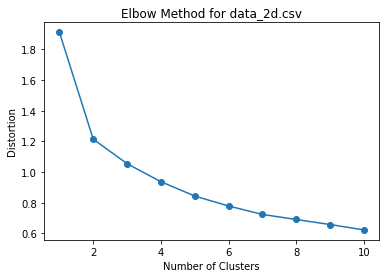

In [10]:
# Візуалізація ліктя для data_2d.csv
plt.plot(range(1, max_clusters_data_2d + 1), distortions_data_2d, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for data_2d.csv')
plt.show()




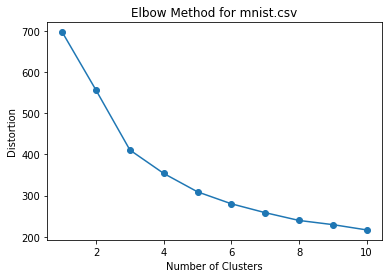

In [11]:
# Для mnist.csv
X_mnist = mnist.values

# Зменшення розмірності до 2D за допомогою PCA
pca = PCA(n_components=2)
X_mnist_pca = pca.fit_transform(X_mnist)

distortions_mnist = []
max_clusters_mnist = 10

for k in range(1, max_clusters_mnist + 1):
    kmeans_mnist = KMeans(n_clusters=k, random_state=42)
    kmeans_mnist.fit(X_mnist_pca)
    distortions_mnist.append(sum(np.min(pairwise_distances(X_mnist_pca, kmeans_mnist.cluster_centers_, metric='euclidean'), axis=1)) / X_mnist_pca.shape[0])

# Візуалізація ліктя для mnist.csv
plt.plot(range(1, max_clusters_mnist + 1), distortions_mnist, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for mnist.csv')
plt.show()

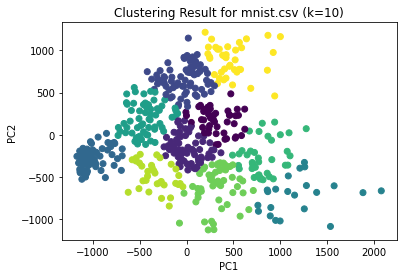

In [13]:
# Візуалізація результатів кластеризації mnist.csv (scatter plot)
best_k = np.argmin(distortions_mnist) + 1
kmeans_mnist = KMeans(n_clusters=best_k, random_state=42)
kmeans_mnist.fit(X_mnist_pca)
labels = kmeans_mnist.labels_

plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Clustering Result for mnist.csv (k={best_k})')
plt.show()
